# Song Genre Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import optimizers, utils
from keras.layers import Dense,  Embedding, Conv1D, Flatten
import numpy as np
import os
from sklearn import model_selection

# plot configuration
plt.rcParams["figure.figsize"] = 5, 5

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("lyrics_demo.csv", skip_blank_lines=True).dropna()

dataset.head(5)


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


### Data visualisation

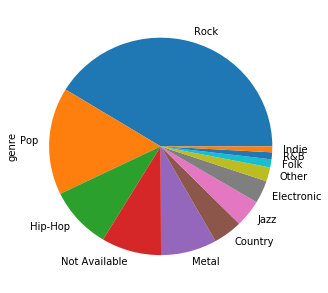

In [3]:
dataset['genre'].value_counts().plot.pie()

plt.show()

In [4]:
dataset.dtypes

index     object
song      object
year      object
artist    object
genre     object
lyrics    object
dtype: object

In [5]:
array = dataset.values
X = array[:,5]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Y_train[4]

'Rock'

In [6]:
max_len = 512
max_features = 6 * 10 ** 5
num_of_categories = len(set(Y))


def gen_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_of_categories, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
    return model


def read_row(num):
    text = ''

    for line in open(path, "r"):
        text += line

    return text

def prepare(texts, labels):
    x = []
    y = []
    seq = tock.texts_to_sequences(texts)
    for i in range(len(labels)):
        j = 0
        imprint = []
        k = 0
        while j < len(seq[i]):
            imprint.append(seq[i][j])
            k += 1
            j += 1
            if k >= max_len:
                x.append(imprint)
                y.append(labels[i])
                imprint = []
                k = 0

    x = np.array(x)
    y = utils.to_categorical(y, num_classes=num_of_categories)

    return x, y


def to_line(song):
    res = ''
    for line in song:
        res += line
    return res


tock = Tokenizer(num_words=max_features)
model = gen_model()


''' UPLOADING TRAIN DATA '''

songs = []
genres = []
G = list(set(Y))

for i in range(X_train.size):
    song_lyrics = X_train[i]
    song_genre = Y_train[i]
    song_genre = G.index(song_genre)
    song_line = to_line(song_lyrics)
    
    songs.append(song_line)
    genres.append(song_genre)

tock.fit_on_texts(songs)
x, y = prepare(songs, genres)
model.fit(x, y, epochs=2, verbose=1)


''' UPLOADING VALIDATION DATA '''

songs = []
genres = []

for i in range(X_validation.size):
    song_lyrics = X_validation[i]
    song_genre = Y_validation[i]
    song_genre = G.index(song_genre)
    song_line = to_line(song_lyrics)
    
    songs.append(song_line)
    genres.append(song_genre)

x, y = prepare(songs, genres)
scores = model.evaluate(x, y, verbose=1)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/2
2217/2217 [==============================] - 66s - loss: 1.0668 - acc: 0.7046    
Epoch 2/2
512/535 [===========================>..] - ETA: 0s
acc: 79.63%
